In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr # for nice colormaps
from fbs import generate_planar_fractional_brownian_surface, generate_spherical_fractional_brownian_surface

cmap = cmr.eclipse

# Generating a planar fractional Brownian surface

In [2]:
H = 0.7

z = generate_planar_fractional_brownian_surface(2024, 1024, H=H, num_components=100, seed=1)

1D fBms generated in 2.690 seconds


100%|██████████| 200/200 [00:03<00:00, 65.52it/s]


planar fractional Brownian surface generated in 6.869 seconds


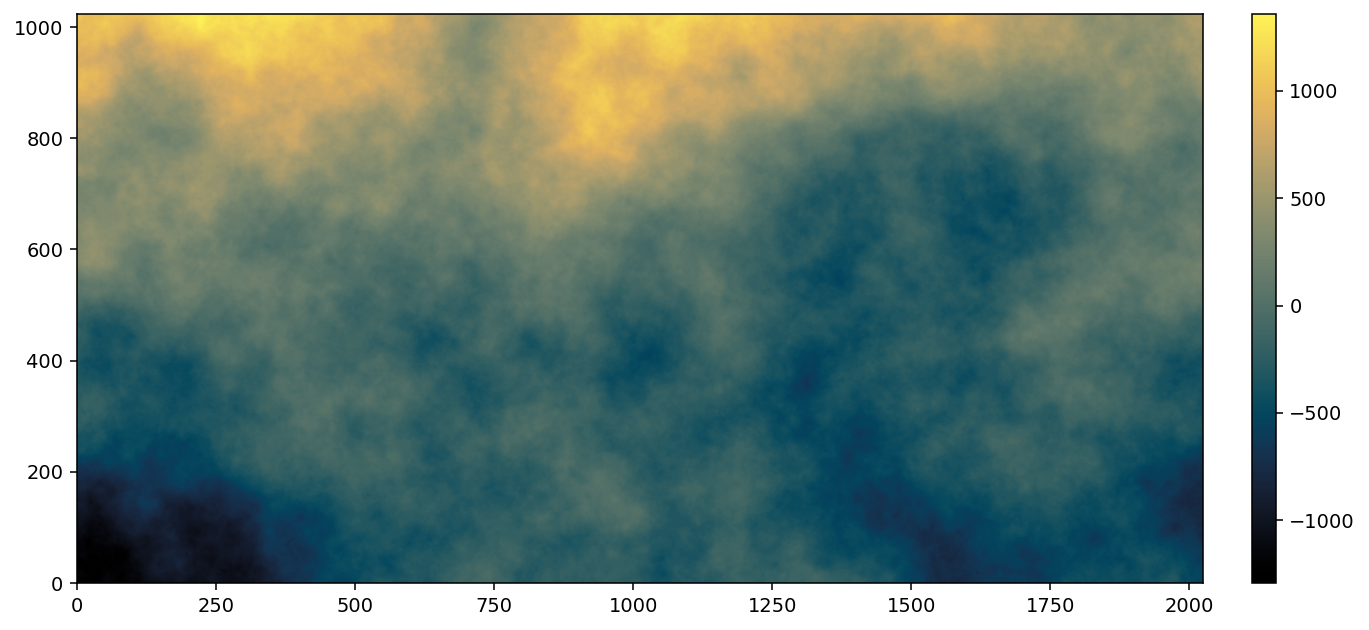

In [3]:
fig, (ax, cax) = plt.subplots(
    1, 2, figsize=(10, 4.6), gridspec_kw={'width_ratios': [1, 0.02]}, layout='tight', dpi=140
)
im = ax.imshow(z, cmap=cmap, origin='lower', aspect='equal')
fig.colorbar(im, cax=cax, orientation='vertical')
fig.savefig('example_pfbs.png', transparent=False, bbox_inches='tight', dpi=140)
plt.show()

# Generating a spherical fractional Brownian surface

In [8]:
H = 0.5
z = generate_spherical_fractional_brownian_surface(2048, H=H, num_components=100, seed=1)

1D fBms generated in 0.103 seconds


100%|██████████| 200/200 [00:11<00:00, 18.01it/s]

spherical fractional Brownian surface generated in 11.211 seconds


C:\Users\taave\AppData\Local\Temp\ipykernel_28904\641661490.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = map.pcolor(xx, yy, z, latlon=False, cmap=cmap)


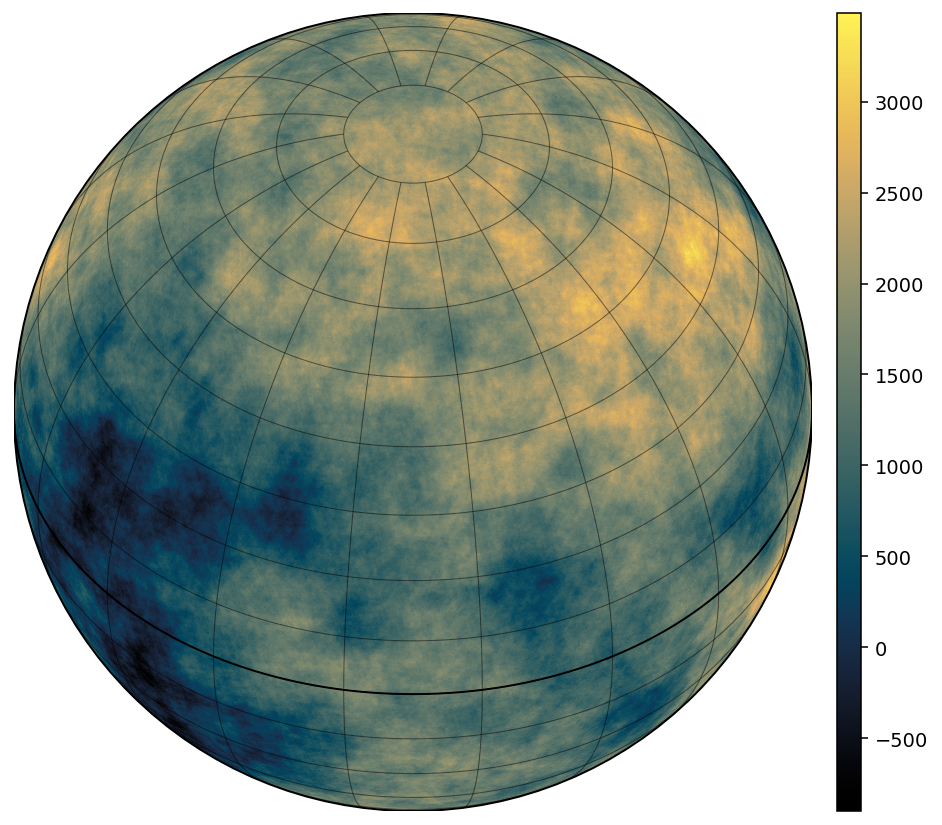

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig, (ax, cax) = plt.subplots(
    1, 2, figsize=(7, 6), gridspec_kw={'width_ratios': [7, 0.2]}, dpi=140, layout='tight'
)
map = Basemap(projection='ortho', lon_0=0, lat_0=45, ax=ax)

x = np.linspace(-180, 180, z.shape[1], endpoint=True)
y = np.linspace(-90, 90, z.shape[0], endpoint=True)

xx, yy = np.meshgrid(x, y)
xx,yy = map(xx, yy)

im = map.pcolor(xx, yy, z, latlon=False, cmap=cmap)

parallels = np.arange(-60.,81,10.)

kw = dict(dashes=(1, 0), linewidth=0.5, color=(0, 0, 0, 0.5))
meridians = np.arange(10.,351.,20.)
map.drawparallels(parallels,labels=[False,False,False,False], **kw)
map.drawmeridians(meridians,labels=[False,False,False,False], **kw)
map.drawparallels([0],labels=[False,False, False,False], dashes=(1, 0), linewidth=1, color=(0, 0, 0))

cb = fig.colorbar(im, cax=cax, orientation='vertical')

fig.savefig('example_sfbs_proj_ortho.png', transparent=False, bbox_inches='tight', dpi=140)
plt.show()

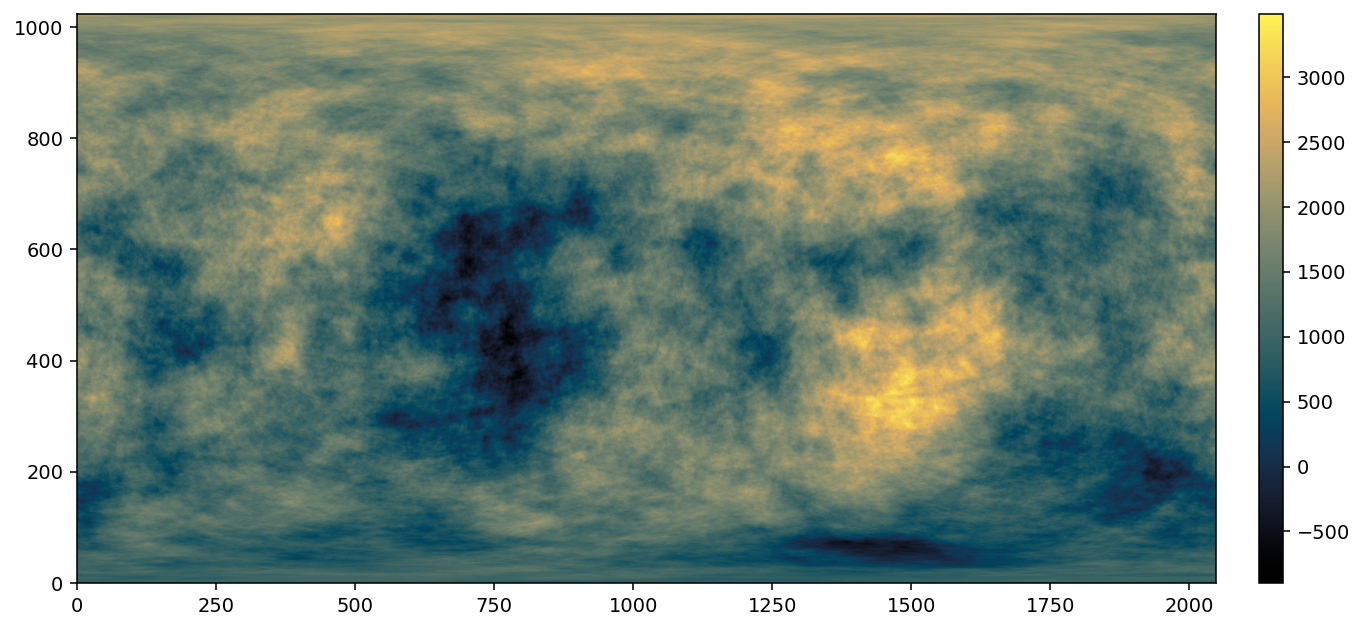

In [10]:
fig, (ax, cax) = plt.subplots(
    1, 2, figsize=(10, 4.6), gridspec_kw={'width_ratios': [1, 0.02]}, layout='tight', dpi=140
)
im = ax.imshow(z, cmap=cmap, origin='lower', aspect='equal')
fig.colorbar(im, cax=cax, orientation='vertical')
fig.savefig('example_sfbs_proj_cyl.png', transparent=False, bbox_inches='tight', dpi=140)
plt.show()